## **Plotting Improper Integrals**
---

>## Type-I Improper integrals
$$
\int_a^\infty f(x) \hspace*{.1cm} dx := \lim_{b \to \infty} \int_a^b f(x) \hspace*{.1cm} dx
$$

Packages used:
<span style="color:yellow; background-color:green">QuadGK, Plots</span>


In [1]:
using QuadGK, Plots

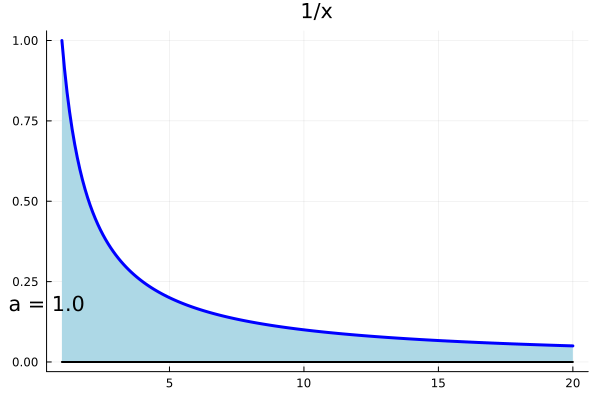

15×3 Matrix{Float64}:
   1.0  0.0      0.0
  21.0  3.04452  2.0902e-10
  41.0  3.71357  2.20864e-10
  61.0  4.11087  9.08912e-9
  81.0  4.39445  2.36192e-10
 101.0  4.61512  1.76585e-9
 121.0  4.79579  9.10584e-9
 141.0  4.94876  3.42455e-8
 161.0  5.0814   2.5366e-10
 181.0  5.1985   6.9034e-10
 201.0  5.3033   1.78378e-9
 221.0  5.39816  4.21528e-9
 241.0  5.4848   9.12409e-9
 261.0  5.56452  1.82788e-8
 281.0  5.63835  3.42639e-8

Upper Limit, Value of Integra, Error Estimate


Integrate over infinity using QuadGK. Note it returns a finite value and a large error:



(37.768496040412806, 0.5085013058700841)

In [6]:
f(x) = 1/x

a = 1.0
xValues = range(a, 20, 200)
yValues = f.(xValues)

p1 = plot(xValues, yValues, lw=3, color=:blue, fillrange=0, fillcolor=:lightblue, legend=false)
plot!(xValues, 0.0 .* xValues, lw=2, color=:black, title="1/x")

# Annotate the starting point
annotate!(p1, (0, 0.2), text("a = $a"))

display(p1)


Data = Array{Float64}(undef, 0, 3)
#
for b=a:20:300
    value, error = quadgk(f, a, b)
    Data = [Data; b value error]
end

println("Upper Limit, Value of Integra, Error Estimate\n")
display(Data)

println("\nIntegrate over infinity using QuadGK. Note it returns a finite value and a large error:\n")
value, error = quadgk(f, a, Inf)

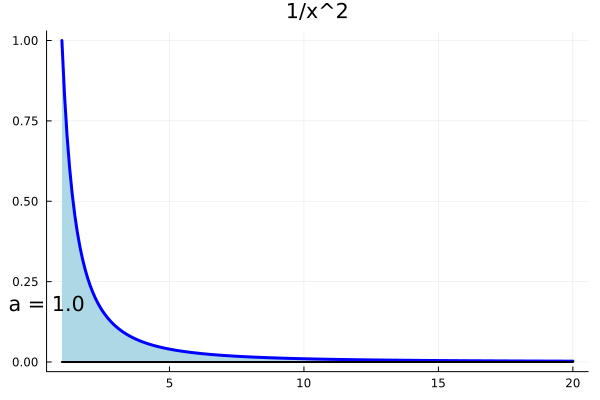

16×3 Matrix{Float64}:
   1.0  0.0       0.0
  21.0  0.952381  1.9989e-9
  41.0  0.97561   2.00495e-9
  61.0  0.983607  1.30251e-10
  81.0  0.987654  2.00894e-9
 101.0  0.990099  3.99341e-11
 121.0  0.991736  1.3317e-10
 141.0  0.992908  5.5439e-10
 161.0  0.993789  2.01124e-9
 181.0  0.994475  6.13648e-9
 201.0  0.995025  4.18216e-11
 221.0  0.995475  6.95458e-11
 241.0  0.995851  1.34773e-10
 261.0  0.996169  2.75242e-10
 281.0  0.996441  5.55783e-10
 301.0  0.996678  1.0812e-9

Upper Limit, Value of Integra, Error Estimate


Integrate over infinity using QuadGK. Note it returns a finite value and a large error:



(1.0, 0.0)

In [5]:
f(x) = 1/x^2

a = 1.0
xValues = range(a, 20, 200)
yValues = f.(xValues)

p1 = plot(xValues, yValues, lw=3, color=:blue, fillrange=0, fillcolor=:lightblue, legend=false)
plot!(xValues, 0.0 .* xValues, lw=2, color=:black, title="1/x^2")

# Annotate the starting point
annotate!(p1, (0, 0.2), text("a = $a"))

display(p1)


Data = Array{Float64}(undef, 0, 3)
#
for b=a:20:300+a
    value, error = quadgk(f, a, b)
    Data = [Data; b value error]
end

println("Upper Limit, Value of Integra, Error Estimate\n")
display(Data)

println("\nIntegrate over infinity using QuadGK. Note it returns a finite value and a large error:\n")
value, error = quadgk(f, a, Inf)

>## Type-II Improper integrals
$$
\text{If c is a finite vertical asymptote}\\
\textbf{Type-II Improper Integral} \hspace*{.3cm}  \int_a^c f(x) \hspace*{.1cm} dx := \lim_{b \to c^{-}} \int_a^b f(x) \hspace*{.1cm} dx \\
\textbf{Type-II Improper Integral} \hspace*{.3cm}  \int_c^b f(x) \hspace*{.1cm} dx := \lim_{a \to c^{+}} \int_a^b f(x) \hspace*{.1cm} dx
$$

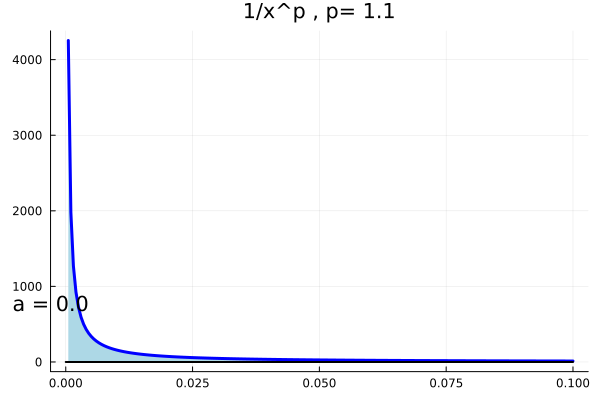

Work out for yourself that this converges for all 0<= p < 1 



DomainError: DomainError with 3.610388751729659e-279:
integrand produced Inf in the interval (0.0, 7.220777503459318e-279)

In [8]:
println("Work out for yourself that this converges for all 0<= p < 1 \n")

p = 0.9
f(x) = 1/x^p

a = 0.0
b = 0.1
xValues = range(a, b, 200)
yValues = f.(xValues)

p1 = plot(xValues, yValues, lw=3, color=:blue, fillrange=0, fillcolor=:lightblue, legend=false)
plot!(xValues, 0.0 .* xValues, lw=2, color=:black, title="1/x^p , p= $p")

# Annotate the starting point
annotate!(p1, (a, 0.2), text("a = $a"))

display(p1)


Data = Array{Float64}(undef, 0, 3)
#
deltaX = 1e-3    
for b=a+deltaX:deltaX:b
    value, error = quadgk(f, a, b)
    Data = [Data; b value error]
end

println("Lower Limit, Value of Integral, Error Estimate\n")
display(Data)

println("\nIntegrate an unbounded integrand:\n")
value, error = quadgk(f, a, b)